In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/digit-recognizer/train.csv')
display(df.head())

# one-hot encording with pandas
t_data = df[['label']].copy()
t_data = pd.get_dummies(t_data, columns=['label'])
display(t_data.head())

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


[pandas.get_dummies()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html?highlight=dummy) : Pandas를 이용한 one-hot encording

In [3]:
# Training, test data split
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(df.drop(columns='label', inplace=False), t_data,
                 test_size=0.3, random_state=0)

# Normalization
scaler = MinMaxScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

In [4]:
# Model
model = Sequential()
model.add(Flatten(input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=SGD(learning_rate=1e-2), 
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_data_train_norm, t_data_train, 
                    epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
735/735 [==============================] - 1s 1ms/step - loss: 2.0022 - accuracy: 0.2705 - val_loss: 1.4074 - val_accuracy: 0.5946
Epoch 2/100
735/735 [==============================] - 1s 991us/step - loss: 1.3280 - accuracy: 0.5364 - val_loss: 0.8182 - val_accuracy: 0.7803
Epoch 3/100
735/735 [==============================] - 1s 1ms/step - loss: 1.0250 - accuracy: 0.6461 - val_loss: 0.6158 - val_accuracy: 0.8362
Epoch 4/100
735/735 [==============================] - 1s 1ms/step - loss: 0.8477 - accuracy: 0.7170 - val_loss: 0.4839 - val_accuracy: 0.8723
Epoch 5/100
735/735 [==============================] - 1s 1ms/step - loss: 0.7168 - accuracy: 0.7679 - val_loss: 0.3925 - val_accuracy: 0.8969
Epoch 6/100
735/735 [==============================] - 1s 1ms/step - loss: 0.6303 - accuracy: 0.8051 - val_loss: 0.3491 - val_accuracy: 0.9070
Epoch 7/100
735/735 [==============================] - 1s 1ms/step - loss: 0.5636 - accuracy: 0.8298 - val_loss: 0.3054 - val_accuracy: 0.91

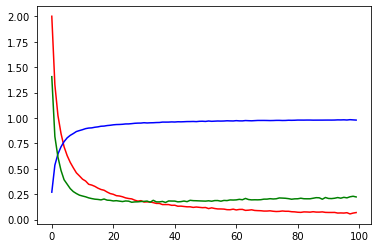

In [5]:
# 학습결과 확인
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['accuracy'], color='b')
plt.plot(history.history['val_loss'], color='g')
plt.show()

In [6]:
# 예측
print(model.evaluate(x_data_test_norm, t_data_test))

394/394 [==============================] - 0s 573us/step - loss: 0.1982 - accuracy: 0.9683
[0.19816230237483978, 0.9683333039283752]


## Model 2 with Adam optimizer

In [13]:
# Model
model2 = Sequential()
model2.add(Flatten(input_shape=(784,)))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer=Adam(learning_rate=1e-4), 
              loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(x_data_train_norm, t_data_train, 
                    epochs=80, verbose=1, validation_split=0.2)

Epoch 1/80
735/735 [==============================] - 1s 1ms/step - loss: 1.9489 - accuracy: 0.3054 - val_loss: 1.3342 - val_accuracy: 0.6187
Epoch 2/80
735/735 [==============================] - 1s 852us/step - loss: 1.3268 - accuracy: 0.5366 - val_loss: 0.8339 - val_accuracy: 0.7505
Epoch 3/80
735/735 [==============================] - 1s 852us/step - loss: 1.0236 - accuracy: 0.6433 - val_loss: 0.6347 - val_accuracy: 0.8361
Epoch 4/80
735/735 [==============================] - 1s 848us/step - loss: 0.8436 - accuracy: 0.7245 - val_loss: 0.4847 - val_accuracy: 0.8900
Epoch 5/80
735/735 [==============================] - 1s 849us/step - loss: 0.7304 - accuracy: 0.7724 - val_loss: 0.3961 - val_accuracy: 0.9031
Epoch 6/80
735/735 [==============================] - 1s 857us/step - loss: 0.6242 - accuracy: 0.8048 - val_loss: 0.3431 - val_accuracy: 0.9114
Epoch 7/80
735/735 [==============================] - 1s 849us/step - loss: 0.5667 - accuracy: 0.8267 - val_loss: 0.3079 - val_accuracy: 0

735/735 [==============================] - 1s 853us/step - loss: 0.0905 - accuracy: 0.9740 - val_loss: 0.2015 - val_accuracy: 0.9638
Epoch 58/80
735/735 [==============================] - 1s 855us/step - loss: 0.0819 - accuracy: 0.9760 - val_loss: 0.2052 - val_accuracy: 0.9634
Epoch 59/80
735/735 [==============================] - 1s 874us/step - loss: 0.0870 - accuracy: 0.9761 - val_loss: 0.2005 - val_accuracy: 0.9638
Epoch 60/80
735/735 [==============================] - 1s 871us/step - loss: 0.0823 - accuracy: 0.9765 - val_loss: 0.1980 - val_accuracy: 0.9639
Epoch 61/80
735/735 [==============================] - 1s 859us/step - loss: 0.0894 - accuracy: 0.9752 - val_loss: 0.2048 - val_accuracy: 0.9634
Epoch 62/80
735/735 [==============================] - 1s 848us/step - loss: 0.0777 - accuracy: 0.9781 - val_loss: 0.2060 - val_accuracy: 0.9643
Epoch 63/80
735/735 [==============================] - 1s 853us/step - loss: 0.0754 - accuracy: 0.9793 - val_loss: 0.2015 - val_accuracy: 0.96

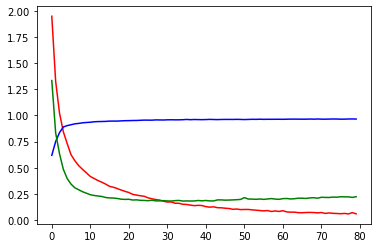

In [14]:
# 학습결과 확인
plt.plot(history2.history['loss'], color='r')
plt.plot(history2.history['val_accuracy'], color='b')
plt.plot(history2.history['val_loss'], color='g')
plt.show()

In [15]:
# 예측
print(model2.evaluate(x_data_test_norm, t_data_test))

394/394 [==============================] - 0s 459us/step - loss: 0.1920 - accuracy: 0.9698
[0.1919657438993454, 0.9697619080543518]
